In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load Dataset
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv'
df = pd.read_csv(url)

In [3]:
# Backup Original Data
df1 = df.copy()

# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

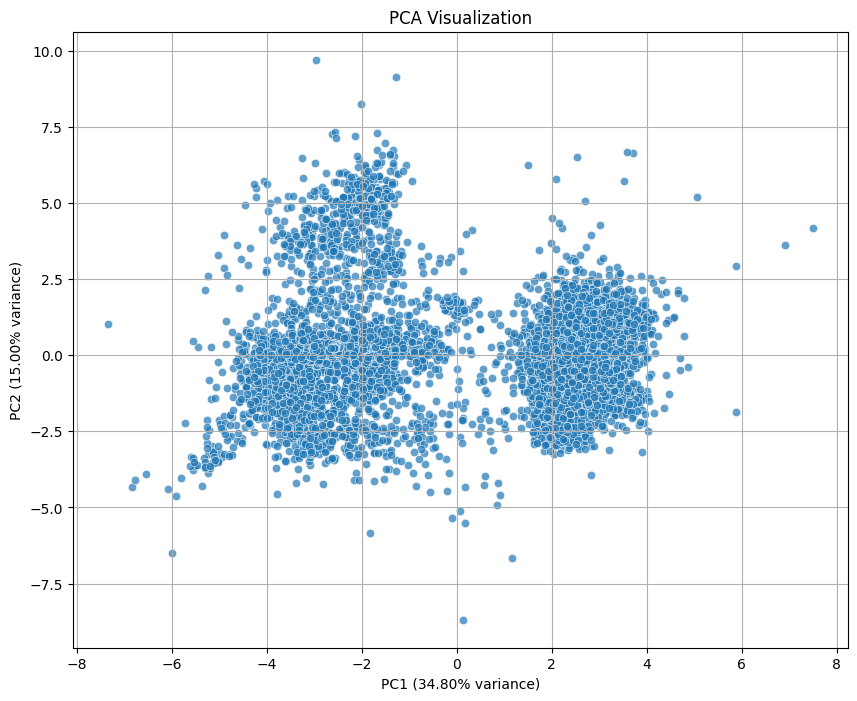

In [4]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.show()

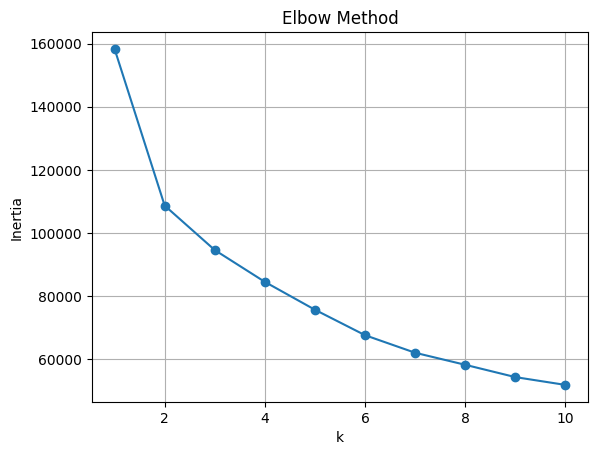

In [5]:
# Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled)
    inertia.append(model.inertia_)
plt.figure()
plt.plot(k_range, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('k'); plt.ylabel('Inertia')
plt.grid(True); plt.show()

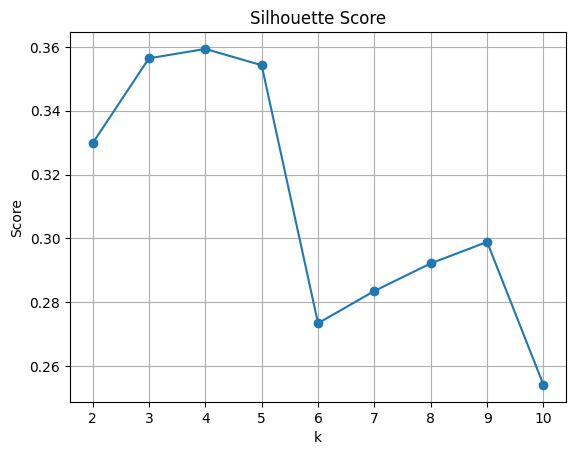

In [6]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled)
    score = silhouette_score(df_scaled, model.labels_)
    silhouette_scores.append(score)
plt.figure()
plt.plot(range(2, 11), silhouette_scores, 'o-')
plt.title('Silhouette Score')
plt.xlabel('k'); plt.ylabel('Score')
plt.grid(True); plt.show()

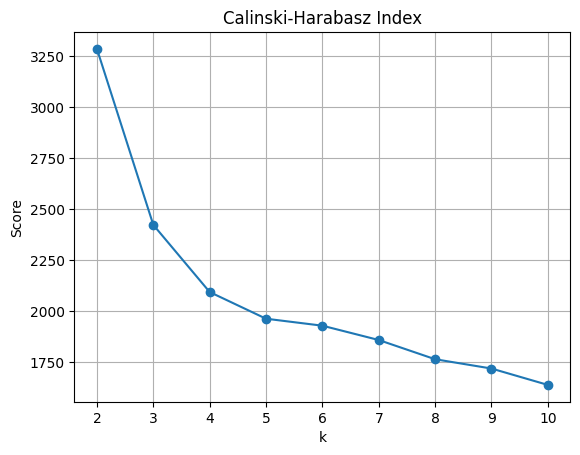

In [7]:
# Calinski-Harabasz
ch_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled)
    ch_scores.append(calinski_harabasz_score(df_scaled, model.labels_))
plt.figure()
plt.plot(range(2, 11), ch_scores, 'o-')
plt.title('Calinski-Harabasz Index')
plt.xlabel('k'); plt.ylabel('Score')
plt.grid(True); plt.show()

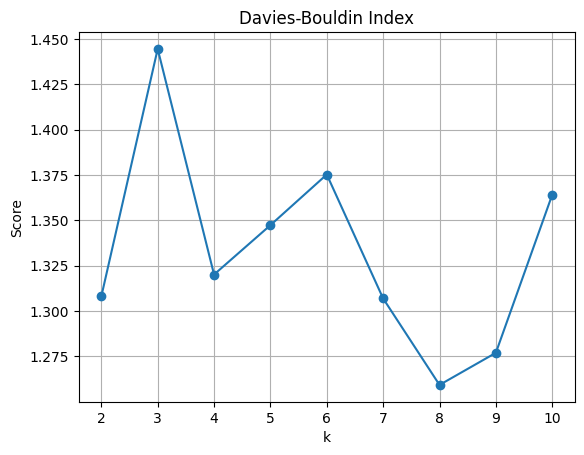

In [8]:
# Davies-Bouldin
db_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled)
    db_scores.append(davies_bouldin_score(df_scaled, model.labels_))
plt.figure()
plt.plot(range(2, 11), db_scores, 'o-')
plt.title('Davies-Bouldin Index')
plt.xlabel('k'); plt.ylabel('Score')
plt.grid(True); plt.show()

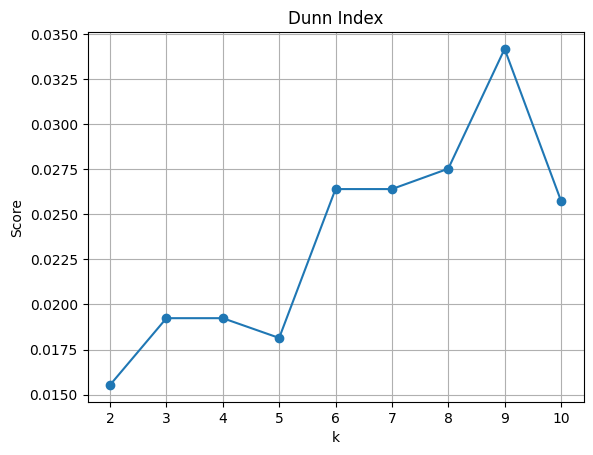

In [9]:
# Dunn Index
from scipy.spatial.distance import cdist
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    intra_dists = [np.max(cdist(X[labels == c], X[labels == c])) for c in unique_clusters]
    inter_dists = [np.min(cdist(X[labels == i], X[labels == j])) for i in unique_clusters for j in unique_clusters if i != j]
    return np.min(inter_dists) / np.max(intra_dists)

dunn_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled)
    dunn_scores.append(dunn_index(df_scaled, model.labels_))
plt.figure()
plt.plot(range(2, 11), dunn_scores, 'o-')
plt.title('Dunn Index')
plt.xlabel('k'); plt.ylabel('Score')
plt.grid(True); plt.show()

In [10]:
# Clustering with best k (based on silhouette)
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(df_scaled)
df['Cluster_KMeans'] = kmeans.labels_

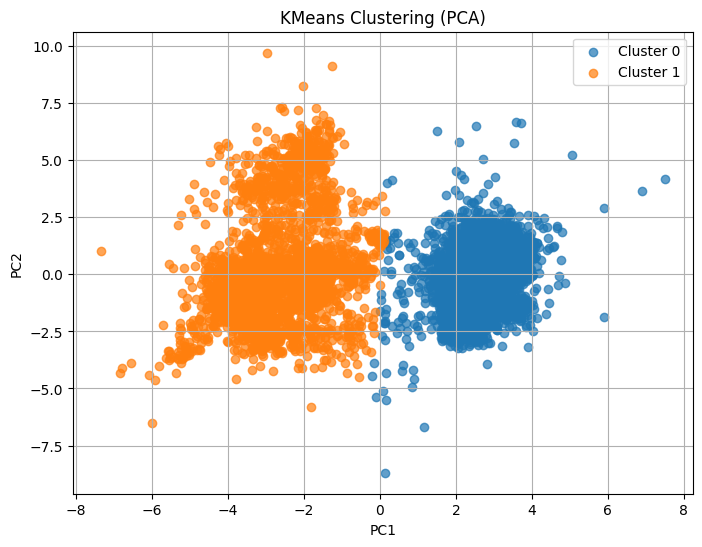

In [11]:
# Visualization of KMeans
plt.figure(figsize=(8,6))
for cluster in range(best_k):
    plt.scatter(X_pca[df['Cluster_KMeans'] == cluster, 0], X_pca[df['Cluster_KMeans'] == cluster, 1], label=f"Cluster {cluster}", alpha=0.7)
plt.title('KMeans Clustering (PCA)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(); plt.grid(True); plt.show()

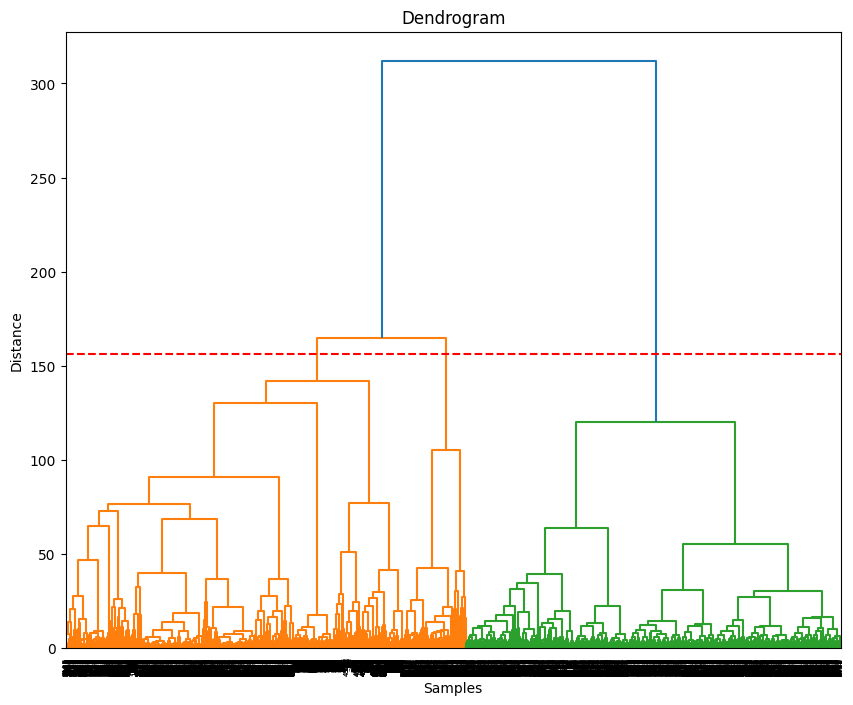

In [12]:
# Hierarchical Clustering
linked = linkage(df_scaled, 'ward')
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram'); plt.xlabel('Samples'); plt.ylabel('Distance')
plt.axhline(y=np.max(linked[:,2])/2, color='r', linestyle='--')
plt.show()

agglo = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
df['Cluster_Hierarchical'] = agglo.fit_predict(df_scaled)

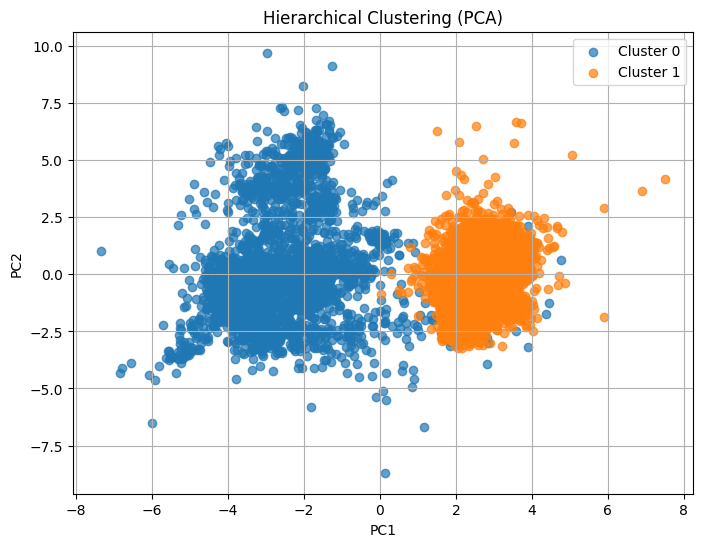

In [13]:
# Visualization of Hierarchical Clustering
plt.figure(figsize=(8,6))
for cluster in range(best_k):
    plt.scatter(X_pca[df['Cluster_Hierarchical'] == cluster, 0], X_pca[df['Cluster_Hierarchical'] == cluster, 1], label=f"Cluster {cluster}", alpha=0.7)
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(); plt.grid(True); plt.show()

## 1. **Inertia (Within-Cluster Sum of Squares – WCSS)**  
Digunakan dalam **Elbow Method** untuk mencari jumlah cluster optimal.

### Rumus:
$$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

### Keterangan:
- $k$: jumlah cluster  
- $C_i$: himpunan data pada cluster ke-$i$  
- $\mu_i$: centroid (titik tengah) dari cluster ke-$i$  
- $\| x_j - \mu_i \|^2$: jarak kuadrat antara titik $x_j$ dan centroid $\mu_i$  

> **Semakin kecil inertia**, maka cluster semakin padat — tapi terlalu kecil bisa jadi overfitting.

---

## 2. **Silhouette Coefficient**

### Rumus:
$$
s = \frac{b - a}{\max(a, b)}
$$

### Keterangan:
- $a$: rata-rata jarak antar titik dalam **cluster yang sama**  
- $b$: rata-rata jarak antar titik dengan **cluster terdekat yang berbeda**  
- $s \in [-1, 1]$  
  - $s \approx 1$: pemisahan antar cluster sangat baik  
  - $s \approx 0$: cluster saling tumpang tindih  
  - $s < 0$: data kemungkinan berada di cluster yang salah

---

## 3. **Calinski-Harabasz Index (Variance Ratio Criterion)**

### Rumus:
$$
CH = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{n - k}{k - 1}
$$

### Keterangan:
- $Tr(B_k)$: varians antar cluster (between-cluster dispersion)  
- $Tr(W_k)$: varians dalam cluster (within-cluster dispersion)  
- $n$: jumlah sampel  
- $k$: jumlah cluster  

> **Semakin tinggi CH**, semakin baik kualitas clustering.

---

## 4. **Davies-Bouldin Index**

### Rumus:
$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

### Keterangan:
- $s_i$: rata-rata jarak antara tiap titik pada cluster ke-$i$ dengan centroid-nya  
- $d_{ij}$: jarak antara centroid cluster ke-$i$ dan ke-$j$  

> **Semakin kecil nilai DB**, semakin baik clustering karena cluster lebih padat dan terpisah jauh.

---

## 5. **Dunn Index**

### Rumus:
$$
D = \frac{\min\limits_{i \ne j} d(C_i, C_j)}{\max\limits_{1 \le k \le K} \delta(C_k)}
$$

### Keterangan:
- $d(C_i, C_j)$: jarak minimum antar cluster $C_i$ dan $C_j$  
- $\delta(C_k)$: jarak maksimum antar dua titik dalam cluster $C_k$  

> **Semakin besar Dunn Index**, semakin baik. Artinya antar cluster saling jauh, dan cluster-nya sendiri padat.
